In [1]:
from matplotlib import pyplot as plt
from fedhex.io import RootLoader

2023-08-11 10:30:10.540402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
root_path = "./root/10x10box_10k_jun2023/"
loader = RootLoader(root_path)

In [3]:
d = loader.load(event_thresh=100, epsilon=0.1)

./root/10x10box_10k_jun2023/
10:30:12.68 <W> --- ./root/10x10box_10k_jun2023//Phi_1870_omega_9p025/2023-06-
12-11-54-06/v1p0-78-8cf4/ATTOAODv1p2c2_0.root: empty file ---


In [4]:
data = loader.get_data()
cond = loader.get_cond()
print(data.shape, cond.shape)

(47665, 2) (47665, 2)


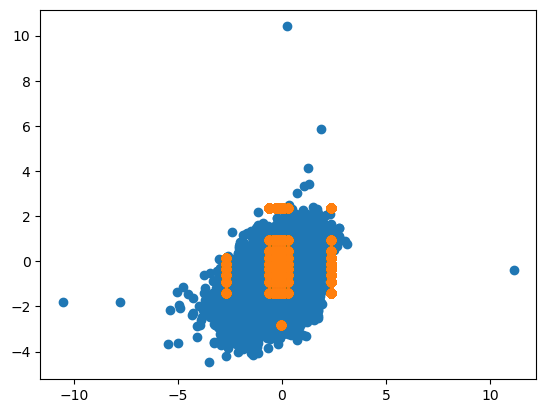

In [5]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(cond[:, 0], cond[:, 1])

In [6]:
samples, labels = loader.recover_preproc()

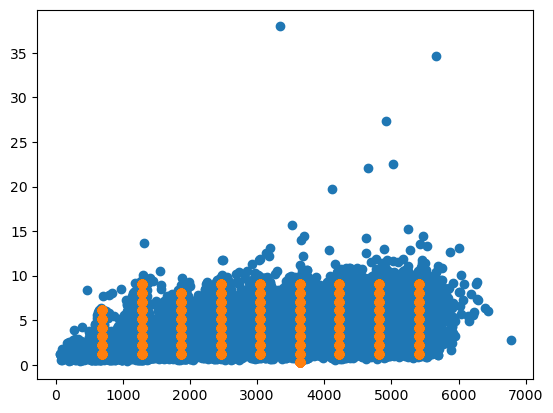

In [7]:
plt.scatter(samples[:, 0], samples[:, 1])
plt.scatter(labels[:, 0], labels[:, 1])

In [8]:
from fedhex.train.tf import MADE, build_MADE, compile_MADE_model, intermediate_MADE, load_MADE, lossfn_MADE, train

In [10]:
from fedhex.utils import Checkpointer, SelectiveProgbarLogger, print_msg

In [13]:
num_made = 5
num_inputs = 2
num_cond_inputs = 2
hidden_layers = 1
hidden_units = 128
lr_start = 1e-3
lr_end = 1e-4
lr_decay_steps = 100
lr_tuple = (lr_start, lr_end, lr_decay_steps)
model, dist, made_list = compile_MADE_model(num_made=num_made,
    num_inputs=num_inputs, num_cond_inputs=num_cond_inputs,
    hidden_layers=hidden_layers, hidden_units=hidden_units, lr_tuple=lr_tuple)

nepochs = 200
batch_size = 1024
starting_epoch = 0
flow_path = "./model/08-11_OOP1/"
callbacks = []

t = print_msg("Beginning Training")
callbacks.append(SelectiveProgbarLogger(verbose=1, epoch_interval=10, epoch_end=nepochs, tstart=t))
callbacks.append(Checkpointer(flow_path + "{epoch:03}.ckpt", save_freq=50 * nepochs))

10:46:52.92 <I> Beginning Training


In [14]:
train(model, data, cond, nepochs=nepochs, batch_size=batch_size, starting_epoch=starting_epoch, flow_path=flow_path, callbacks=callbacks)

10:46:54.11 <I> [Training begins]
epoch begin: 2023-08-11 10:47:08.656507 | time elapsed: 0:00:15.726836
Epoch 10/200
47/47 [==============================] - 1s 18ms/sample - loss: 2.9443
epoch begin: 2023-08-11 10:47:16.730905 | time elapsed: 0:00:23.801234
Epoch 20/200
47/47 [==============================] - 1s 17ms/sample - loss: 1.5762
epoch begin: 2023-08-11 10:47:24.159365 | time elapsed: 0:00:31.229694
Epoch 30/200
47/47 [==============================] - 1s 17ms/sample - loss: 1.1170
epoch begin: 2023-08-11 10:47:31.604783 | time elapsed: 0:00:38.675112
Epoch 40/200
47/47 [==============================] - 1s 16ms/sample - loss: 0.8525
epoch begin: 2023-08-11 10:47:38.545586 | time elapsed: 0:00:45.615915
Epoch 50/200
47/47 [==============================] - 1s 18ms/sample - loss: 0.6484
epoch begin: 2023-08-11 10:47:45.966399 | time elapsed: 0:00:53.036728
Epoch 60/200
47/47 [==============================] - 1s 22ms/sample - loss: 0.5016
epoch begin: 2023-08-11 10:47:54.829

INFO:tensorflow:Assets written to: ./model/08-11_OOP1/assets


INFO:tensorflow:Assets written to: ./model/08-11_OOP1/assets


10:49:48.81 <I> [Training ends]
0:02:54.69 <I> [Time elapsed]
